In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
speaker_data = pd.read_csv('speaker_data.csv')
talk_data = pd.read_csv('talk_data.csv')
transcript_data = pd.read_csv('transcript_data.csv')

In [7]:
speaker_data.isnull().sum()

talk              141
speaker           145
speaker_title    4433
speaker_occ       789
speaker_bio       764
dtype: int64

In [8]:
speaker_data.info()
talk_data.info()
transcript_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4442 entries, 0 to 4441
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   talk           4301 non-null   object
 1   speaker        4297 non-null   object
 2   speaker_title  9 non-null      object
 3   speaker_occ    3653 non-null   object
 4   speaker_bio    3678 non-null   object
dtypes: object(5)
memory usage: 173.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk_desc     4322 non-null   object
 1   event         4322 non-null   object
 2   talk_name     4322 non-null   object
 3   views         4322 non-null   int64 
 4   duration      4322 non-null   int64 
 5   tags          4322 non-null   object
 6   recorded_at   4322 non-null   object
 7   published on  4322 non-null   int64 
dtypes: int64(3), object(

In [9]:
# Remove rows with no talk 
speaker_data=speaker_data.dropna(subset=['talk'])

In [10]:
speaker_data.isnull().sum()

talk                0
speaker             4
speaker_title    4292
speaker_occ       648
speaker_bio       623
dtype: int64

In [11]:
speaker_data=speaker_data.drop(columns=['speaker_title'])

In [12]:
speaker_data.isnull().sum()

talk             0
speaker          4
speaker_occ    648
speaker_bio    623
dtype: int64

In [13]:
#fill the null values for speaker occ with "unknown"
speaker_data['speaker_occ'] = speaker_data['speaker_occ'].fillna('Unknown')

In [14]:
#fill the null values for speaker bio with "unknown"
speaker_data['speaker_bio'] = speaker_data['speaker_bio'].fillna('Unknown')

In [15]:
speaker_data.isnull().sum()

talk           0
speaker        4
speaker_occ    0
speaker_bio    0
dtype: int64

In [16]:
#fill the null values for speaker with "unknown"
speaker_data['speaker'] = speaker_data['speaker'].fillna('Unknown')

In [17]:
speaker_data.isnull().sum()

talk           0
speaker        0
speaker_occ    0
speaker_bio    0
dtype: int64

In [18]:
talk_data.head()

,talk_desc,event,talk_name,views,duration,tags,recorded_at,published on
0,It's 1997. The United States Senate has called...,TED-Ed,Can you outsmart the apples and oranges fallacy?,119359,327,"['education', 'psychology', 'animation', 'TED-...",2021-04-05T00:00:00.000+00:00,1617636753
1,Colleges and universities in the US make billi...,TEDxDayton,The exploitation of US college athletes,438573,611,"['sports', 'law', 'education', 'United States'...",2020-11-10T00:00:00.000+00:00,1617634131
2,"In a dark cave, bats can't see much. But even ...",TED-Ed,How does ultrasound work?,140874,295,"['education', 'technology', 'animation', 'TED-...",2021-04-01T00:00:00.000+00:00,1617290223
3,"With candor and cunning, sex historian Kate Li...",TEDxUniversityofGlasgow,"An honest history of an ancient and ""nasty"" word",569477,1148,"['sex', 'language', 'ancient world', 'history'...",2020-03-06T00:00:00.000+00:00,1617289565
4,DNA isn't the only builder in the biological w...,TED2020,The electrical blueprints that orchestrate life,122682,1176,"['biology', 'science', 'invention', 'robots', ...",2020-05-18T00:00:00.000+00:00,1617213773


In [19]:
#no null values
talk_data.isnull().sum()

talk_desc       0
event           0
talk_name       0
views           0
duration        0
tags            0
recorded_at     0
published on    0
dtype: int64

In [20]:
transcript_data.isnull().sum()

title           0
transcript    144
dtype: int64

In [21]:
transcript_data = transcript_data.dropna(subset=['transcript'])

In [22]:
df = pd.merge(speaker_data, talk_data, how='inner', left_on = 'talk', right_on = 'talk_name')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418 entries, 0 to 4417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk          4418 non-null   object
 1   speaker       4418 non-null   object
 2   speaker_occ   4418 non-null   object
 3   speaker_bio   4418 non-null   object
 4   talk_desc     4418 non-null   object
 5   event         4418 non-null   object
 6   talk_name     4418 non-null   object
 7   views         4418 non-null   int64 
 8   duration      4418 non-null   int64 
 9   tags          4418 non-null   object
 10  recorded_at   4418 non-null   object
 11  published on  4418 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 448.7+ KB


In [24]:
df.head()

,talk,speaker,speaker_occ,speaker_bio,talk_desc,event,talk_name,views,duration,tags,recorded_at,published on
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,Unknown,Unknown,It's 1997. The United States Senate has called...,TED-Ed,Can you outsmart the apples and oranges fallacy?,119359,327,"['education', 'psychology', 'animation', 'TED-...",2021-04-05T00:00:00.000+00:00,1617636753
1,The exploitation of US college athletes,Tim Nevius,College sports lawyer,Tim Nevius is a leading sports lawyer and coll...,Colleges and universities in the US make billi...,TEDxDayton,The exploitation of US college athletes,438573,611,"['sports', 'law', 'education', 'United States'...",2020-11-10T00:00:00.000+00:00,1617634131
2,How does ultrasound work?,Jacques Abramowicz,Unknown,Unknown,"In a dark cave, bats can't see much. But even ...",TED-Ed,How does ultrasound work?,140874,295,"['education', 'technology', 'animation', 'TED-...",2021-04-01T00:00:00.000+00:00,1617290223
3,"An honest history of an ancient and ""nasty"" word",Kate Lister,Sex historian,Kate Lister is a sex historian and lecturers a...,"With candor and cunning, sex historian Kate Li...",TEDxUniversityofGlasgow,"An honest history of an ancient and ""nasty"" word",569477,1148,"['sex', 'language', 'ancient world', 'history'...",2020-03-06T00:00:00.000+00:00,1617289565
4,The electrical blueprints that orchestrate life,Michael Levin,Bioelectric explorer,Michael Levin's research could give rise to ad...,DNA isn't the only builder in the biological w...,TED2020,The electrical blueprints that orchestrate life,122682,1176,"['biology', 'science', 'invention', 'robots', ...",2020-05-18T00:00:00.000+00:00,1617213773


In [25]:
#Dropping the duplicate column 'talk_name'
df = df.drop(columns=['talk_name'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418 entries, 0 to 4417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk          4418 non-null   object
 1   speaker       4418 non-null   object
 2   speaker_occ   4418 non-null   object
 3   speaker_bio   4418 non-null   object
 4   talk_desc     4418 non-null   object
 5   event         4418 non-null   object
 6   views         4418 non-null   int64 
 7   duration      4418 non-null   int64 
 8   tags          4418 non-null   object
 9   recorded_at   4418 non-null   object
 10  published on  4418 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 414.2+ KB


In [27]:
df = pd.merge(df, transcript_data, how='inner', left_on = 'talk', right_on = 'title')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7167 entries, 0 to 7166
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk          7167 non-null   object
 1   speaker       7167 non-null   object
 2   speaker_occ   7167 non-null   object
 3   speaker_bio   7167 non-null   object
 4   talk_desc     7167 non-null   object
 5   event         7167 non-null   object
 6   views         7167 non-null   int64 
 7   duration      7167 non-null   int64 
 8   tags          7167 non-null   object
 9   recorded_at   7167 non-null   object
 10  published on  7167 non-null   int64 
 11  title         7167 non-null   object
 12  transcript    7167 non-null   object
dtypes: int64(3), object(10)
memory usage: 783.9+ KB


In [29]:
df.head()

,talk,speaker,speaker_occ,speaker_bio,talk_desc,event,views,duration,tags,recorded_at,published on,title,transcript
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,Unknown,Unknown,It's 1997. The United States Senate has called...,TED-Ed,119359,327,"['education', 'psychology', 'animation', 'TED-...",2021-04-05T00:00:00.000+00:00,1617636753,Can you outsmart the apples and oranges fallacy?,Baking apple pie? Discount orange warehouse ha...
1,The exploitation of US college athletes,Tim Nevius,College sports lawyer,Tim Nevius is a leading sports lawyer and coll...,Colleges and universities in the US make billi...,TEDxDayton,438573,611,"['sports', 'law', 'education', 'United States'...",2020-11-10T00:00:00.000+00:00,1617634131,The exploitation of US college athletes,"In college sports, American universities are e..."
2,How does ultrasound work?,Jacques Abramowicz,Unknown,Unknown,"In a dark cave, bats can't see much. But even ...",TED-Ed,140874,295,"['education', 'technology', 'animation', 'TED-...",2021-04-01T00:00:00.000+00:00,1617290223,How does ultrasound work?,"In a pitch-black cave, bats can’t see much. Bu..."
3,"An honest history of an ancient and ""nasty"" word",Kate Lister,Sex historian,Kate Lister is a sex historian and lecturers a...,"With candor and cunning, sex historian Kate Li...",TEDxUniversityofGlasgow,569477,1148,"['sex', 'language', 'ancient world', 'history'...",2020-03-06T00:00:00.000+00:00,1617289565,"An honest history of an ancient and ""nasty"" word","First, a warning. As far as offensive words go..."
4,The electrical blueprints that orchestrate life,Michael Levin,Bioelectric explorer,Michael Levin's research could give rise to ad...,DNA isn't the only builder in the biological w...,TED2020,122682,1176,"['biology', 'science', 'invention', 'robots', ...",2020-05-18T00:00:00.000+00:00,1617213773,The electrical blueprints that orchestrate life,"Chris Anderson: Mike, welcome. It's good to se..."


In [30]:
df = df.drop(columns=['title'])

In [31]:
df.head(50)

,talk,speaker,speaker_occ,speaker_bio,talk_desc,event,views,duration,tags,recorded_at,published on,transcript
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,Unknown,Unknown,It's 1997. The United States Senate has called...,TED-Ed,119359,327,"['education', 'psychology', 'animation', 'TED-...",2021-04-05T00:00:00.000+00:00,1617636753,Baking apple pie? Discount orange warehouse ha...
1,The exploitation of US college athletes,Tim Nevius,College sports lawyer,Tim Nevius is a leading sports lawyer and coll...,Colleges and universities in the US make billi...,TEDxDayton,438573,611,"['sports', 'law', 'education', 'United States'...",2020-11-10T00:00:00.000+00:00,1617634131,"In college sports, American universities are e..."
2,How does ultrasound work?,Jacques Abramowicz,Unknown,Unknown,"In a dark cave, bats can't see much. But even ...",TED-Ed,140874,295,"['education', 'technology', 'animation', 'TED-...",2021-04-01T00:00:00.000+00:00,1617290223,"In a pitch-black cave, bats can’t see much. Bu..."
3,"An honest history of an ancient and ""nasty"" word",Kate Lister,Sex historian,Kate Lister is a sex historian and lecturers a...,"With candor and cunning, sex historian Kate Li...",TEDxUniversityofGlasgow,569477,1148,"['sex', 'language', 'ancient world', 'history'...",2020-03-06T00:00:00.000+00:00,1617289565,"First, a warning. As far as offensive words go..."
4,The electrical blueprints that orchestrate life,Michael Levin,Bioelectric explorer,Michael Levin's research could give rise to ad...,DNA isn't the only builder in the biological w...,TED2020,122682,1176,"['biology', 'science', 'invention', 'robots', ...",2020-05-18T00:00:00.000+00:00,1617213773,"Chris Anderson: Mike, welcome. It's good to se..."
5,Language around gender and identity evolves (a...,Archie Crowley,Sociolinguist,Archie Crowley studies the relationship betwee...,"Dictionaries and grammar ""rules"" don't have th...",TEDxUofSC,562325,794,"['language', 'LGBT', 'history', 'Transgender',...",2020-10-21T00:00:00.000+00:00,1617203258,I am a linguist. Linguists study language. And...
6,A brief history of the devil,Brian Pavlac,Unknown,Unknown,"Satan, the beast crunching sinners' bones. Luc...",TED-Ed,323035,286,"['TED-Ed', 'religion', 'history', 'education',...",2021-03-30T00:00:00.000+00:00,1617133321,"Satan, the beast crunching sinners’ bones in h..."
7,The seeds of change helping African farmers gr...,Andrew Youn,Executive Director and Cofounder of One Acre Fund,"With One Acre Fund, Andrew Youn fights poverty...","Farmers stand at the center of the world, says...",TED2020,53131,387,"['Audacious Project', 'agriculture', 'global d...",2020-06-18T00:00:00.000+00:00,1617114798,(Voice-over) Andrew Youn: I have incredible be...
8,Can you solve the fantasy election riddle?,Dennis Shasha,Unknown,Unknown,"After much debate, the realm has decided drago...",TED-Ed,239236,327,"['TED-Ed', 'animation', 'education', 'democrac...",2021-03-25T00:00:00.000+00:00,1616693715,"After much debate, the fantasy realm you call..."
9,An election system that puts voters (not polit...,Amber McReynolds,"Voting rights expert, democracy entrepreneur",Amber McReynolds's vision is to create electio...,From hours-long lines and limited polling loca...,TEDxMileHigh,648341,619,"['United States', 'democracy', 'politics', 'so...",2020-08-29T00:00:00.000+00:00,1616685527,"Voting can be hard. It's been hard, sometimes ..."


In [32]:
#Removing all rows which have duplicated talk name
df = df.drop_duplicates(subset=['talk'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4016 entries, 0 to 7166
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk          4016 non-null   object
 1   speaker       4016 non-null   object
 2   speaker_occ   4016 non-null   object
 3   speaker_bio   4016 non-null   object
 4   talk_desc     4016 non-null   object
 5   event         4016 non-null   object
 6   views         4016 non-null   int64 
 7   duration      4016 non-null   int64 
 8   tags          4016 non-null   object
 9   recorded_at   4016 non-null   object
 10  published on  4016 non-null   int64 
 11  transcript    4016 non-null   object
dtypes: int64(3), object(9)
memory usage: 407.9+ KB


In [34]:
df.to_csv('clean_data_Mithra.csv',index=False)

In [35]:
df.head(1)

,talk,speaker,speaker_occ,speaker_bio,talk_desc,event,views,duration,tags,recorded_at,published on,transcript
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,Unknown,Unknown,It's 1997. The United States Senate has called...,TED-Ed,119359,327,"['education', 'psychology', 'animation', 'TED-...",2021-04-05T00:00:00.000+00:00,1617636753,Baking apple pie? Discount orange warehouse ha...


In [36]:
# convert the recorded_at  Date to datetime
df['recorded_at'] = pd.to_datetime(df['recorded_at'])
# add a column for Year
df['Year'] = df['recorded_at'].dt.year
# print the dataframe
print(df)

                                                  talk             speaker  \
0     Can you outsmart the apples and oranges fallacy?       Elizabeth Cox   
1              The exploitation of US college athletes          Tim Nevius   
2                            How does ultrasound work?  Jacques Abramowicz   
3     An honest history of an ancient and "nasty" word         Kate Lister   
4      The electrical blueprints that orchestrate life       Michael Levin   
...                                                ...                 ...   
7162                   The best stats you've ever seen        Hans Rosling   
7163                       Do schools kill creativity?    Sir Ken Robinson   
7164                               Greening the ghetto       Majora Carter   
7165                                  Simplicity sells         David Pogue   
7166                       Averting the climate crisis             Al Gore   

                               speaker_occ  \
0                

In [37]:
df.head(3)

,talk,speaker,speaker_occ,speaker_bio,talk_desc,event,views,duration,tags,recorded_at,published on,transcript,Year
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,Unknown,Unknown,It's 1997. The United States Senate has called...,TED-Ed,119359,327,"['education', 'psychology', 'animation', 'TED-...",2021-04-05 00:00:00+00:00,1617636753,Baking apple pie? Discount orange warehouse ha...,2021
1,The exploitation of US college athletes,Tim Nevius,College sports lawyer,Tim Nevius is a leading sports lawyer and coll...,Colleges and universities in the US make billi...,TEDxDayton,438573,611,"['sports', 'law', 'education', 'United States'...",2020-11-10 00:00:00+00:00,1617634131,"In college sports, American universities are e...",2020
2,How does ultrasound work?,Jacques Abramowicz,Unknown,Unknown,"In a dark cave, bats can't see much. But even ...",TED-Ed,140874,295,"['education', 'technology', 'animation', 'TED-...",2021-04-01 00:00:00+00:00,1617290223,"In a pitch-black cave, bats can’t see much. Bu...",2021


 Plot the number of talks that took place each year

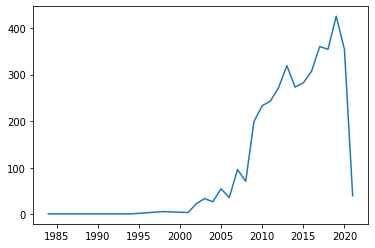

In [38]:
df['year'] = pd.to_datetime(df['recorded_at']).dt.year
df.Year.value_counts().sort_index().plot()

Finding out the best events in the TED 

In [39]:
df.groupby('event').views.agg(['mean','count','sum']).sort_values('mean').tail()

,mean,count,sum
event,,,
TEDxMidAtlantic 2013,1.468846e+07,3,44065366
TEDxCreativeCoast,2.381281e+07,1,23812808
TEDxHull,3.512422e+07,1,35124222
TEDxHouston,5.287168e+07,1,52871680
TEDxPuget Sound,5.435166e+07,1,54351663


In [40]:
famous_talks = df[['speaker', 'views', 'recorded_at']].sort_values('views', ascending=False)[:15]
famous_talks

,speaker,views,recorded_at
7163,Sir Ken Robinson,70176973,2006-02-25 00:00:00+00:00
1985,James Veitch,63683410,2015-12-08 00:00:00+00:00
5984,Amy Cuddy,61030600,2012-06-26 00:00:00+00:00
6588,Simon Sinek,54351663,2009-09-17 00:00:00+00:00
6450,Brené Brown,52871680,2010-06-06 00:00:00+00:00
1935,Tim Urban,49876247,2016-02-16 00:00:00+00:00
2369,Julian Treasure,45961304,2013-06-10 00:00:00+00:00
2173,Bill Gates,40591593,2015-03-18 00:00:00+00:00
1343,Sam Berns,40315294,2013-10-25 00:00:00+00:00
1990,Robert Waldinger,37902552,2015-11-14 00:00:00+00:00


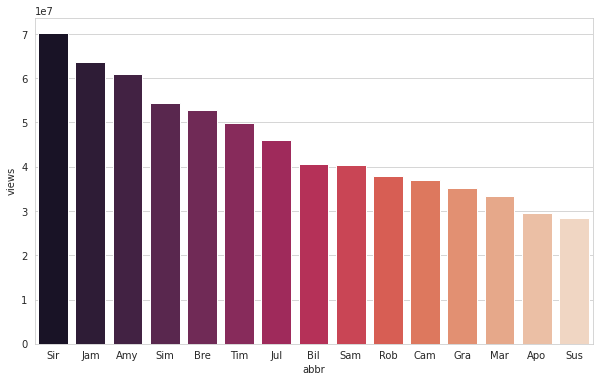

In [42]:
famous_talks['abbr'] = famous_talks['speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views',palette="rocket", data=famous_talks)


**Analysing TED Talks by the month and the year**

In [43]:
# month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
# df['month'] = df['recorded_at'].dt.month
# df['month'] = df['recorded_at'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

# month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
# month_df.columns = ['month', 'talks']


In [ ]:
# sns.barplot(x='month', y='talks', data=month_df, order=month_order)


In [ ]:
# df_x = df[df['event'].str.contains('TEDx')]
# x_month_df = pd.DataFrame(df_x['month'].value_counts().reset_index())
# x_month_df.columns = ['month', 'talks']

In [ ]:
# sns.barplot(x='month', y='talks', data=x_month_df, order=month_order)